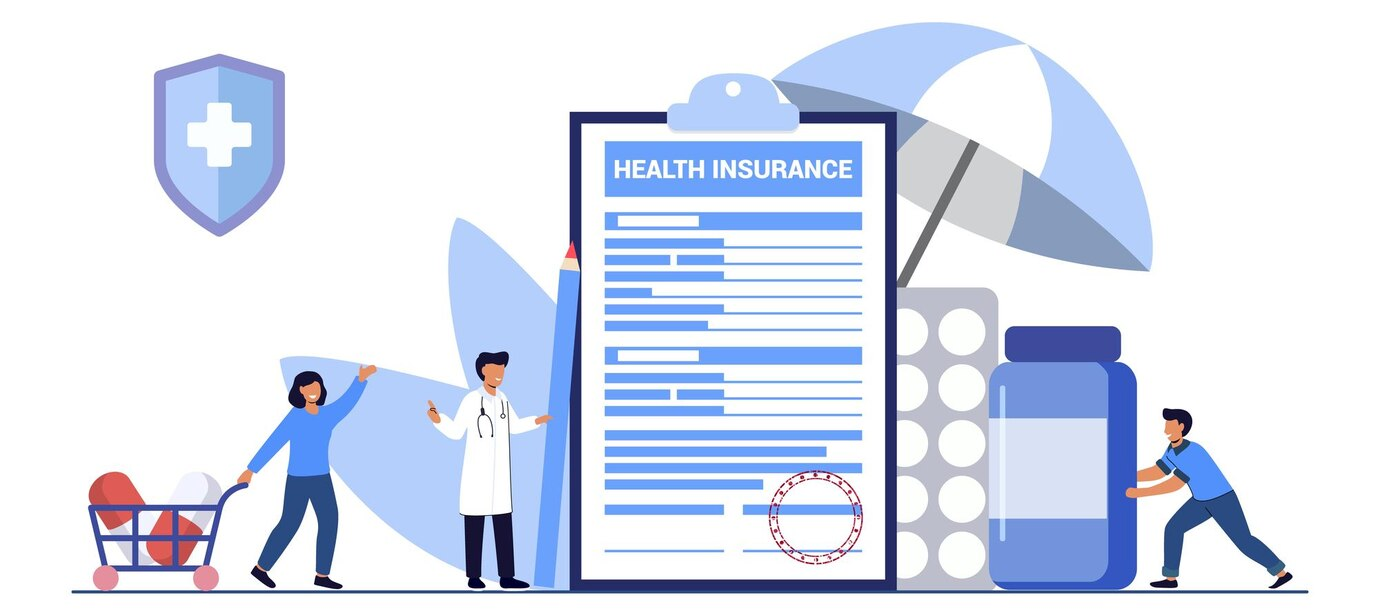

In [ ]:
from IPython.display import Image

Image('health-insurance1.jpg')

Importing Dependencies

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [128]:
# loading data from csv file to Pandas Dataframe
insurance_dataset = pd.read_csv('insurance.csv')

In [129]:
#first 10 rows of dataframe
insurance_dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [130]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [131]:
# getting some information about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [132]:
# checking number of missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [133]:
# statistical measures of dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\shaha\AppData\Local\Temp\ipykernel_9900\88623624.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


Text(0.5, 1.0, 'Age Distribution')

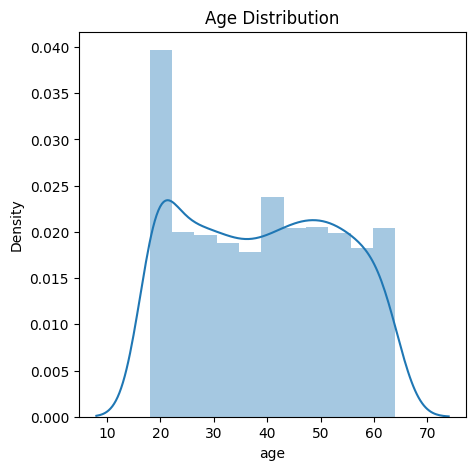

In [134]:
# distribution of age value
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Gender Distribution')

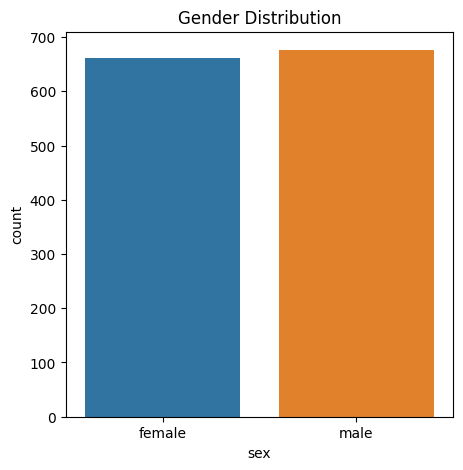

In [135]:
# gender column
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=insurance_dataset,hue='sex')
plt.title('Gender Distribution')

In [136]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\shaha\AppData\Local\Temp\ipykernel_9900\2540924127.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


Text(0.5, 1.0, 'BMI Distribution')

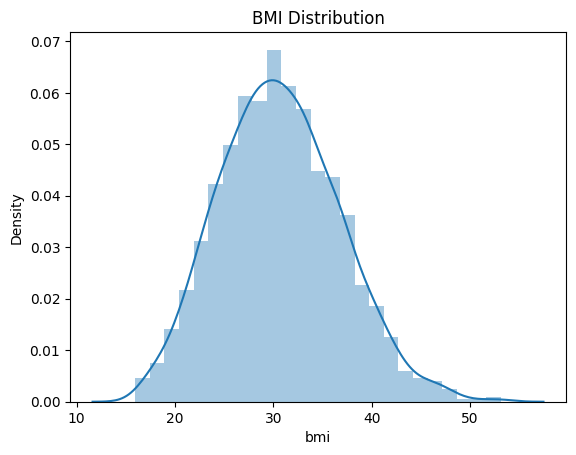

In [137]:
# bmi distribution
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Children Distribution')

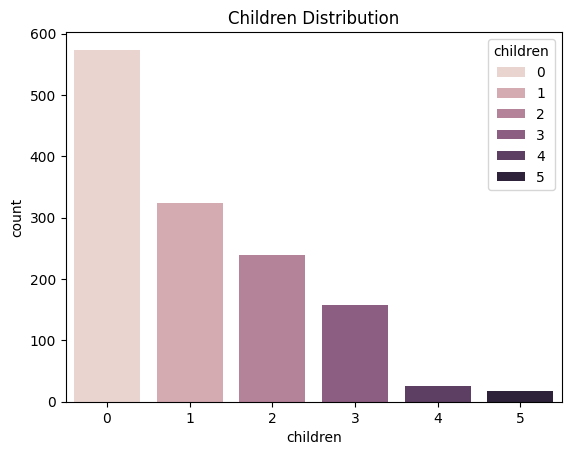

In [138]:
#children column
sns.countplot(x='children',data=insurance_dataset,hue='children')
plt.title('Children Distribution')

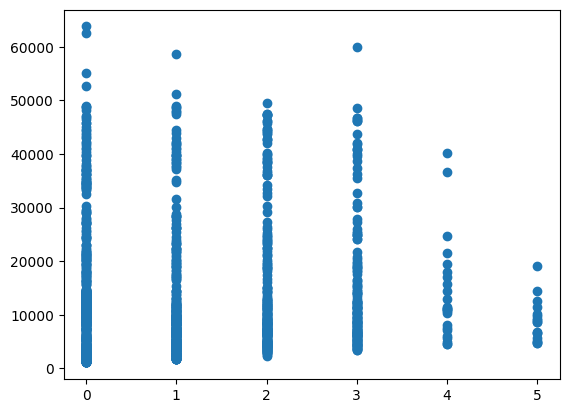

In [139]:
plt.scatter(x=insurance_dataset['children'],y=insurance_dataset['charges'])

In [140]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Text(0.5, 1.0, 'Smoker Distribution')

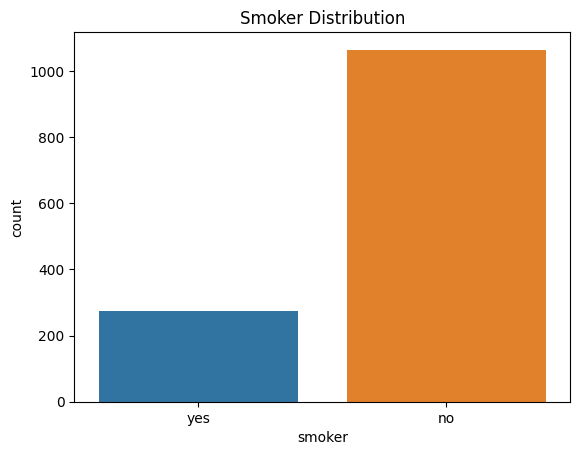

In [141]:
# smoker column
sns.countplot(x='smoker',data=insurance_dataset,hue='smoker')
plt.title('Smoker Distribution')

In [142]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Text(0.5, 1.0, 'Region Distribution')

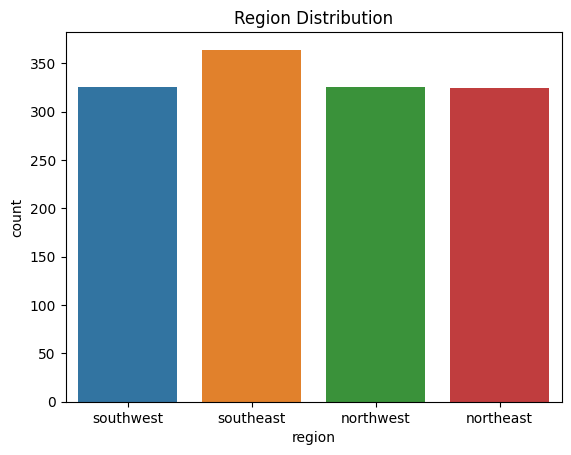

In [143]:
# region column
sns.countplot(x='region',data=insurance_dataset,hue='region')
plt.title('Region Distribution')

In [144]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\shaha\AppData\Local\Temp\ipykernel_9900\1462209255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


Text(0.5, 1.0, 'Charges Distribution')

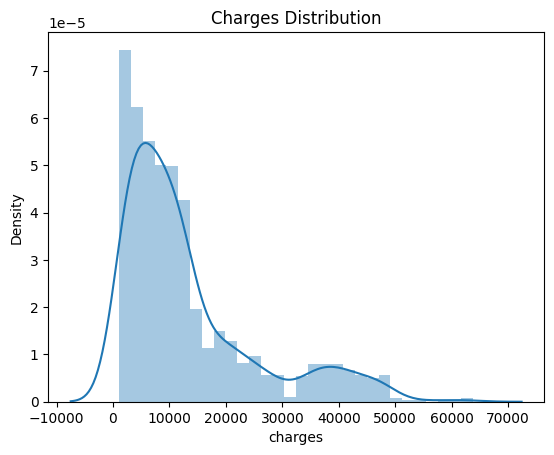

In [145]:
# distribution of charges value
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')

Data Pre-Processing

Checking for Duplicates

In [146]:
insurance_dataset.duplicated().sum()

1

In [147]:
# removing the single duplicate detected
insurance_dataset1 = insurance_dataset.drop_duplicates(ignore_index=True)

In [148]:
insurance_dataset1.duplicated().sum()

0

Feature Engineering

Creating a new category column to make model more accurate

In [149]:
insurance_dataset1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [150]:
def categorize(age):
    if age <= 29:
        return 'Young'
    elif age > 29 and age < 50:
        return 'Mid-Age'
    else:
        return 'Old'
    
insurance_dataset1['age_category'] = insurance_dataset1['age'].apply(categorize)
insurance_dataset1 = insurance_dataset1.drop('age',axis=1)
insurance_dataset1

C:\Users\shaha\AppData\Local\Temp\ipykernel_9900\1978300024.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_dataset1['age_category'] = insurance_dataset1['age'].apply(categorize)


,sex,bmi,children,smoker,region,charges,age_category
0,female,27.900,0,yes,southwest,16884.92400,Young
1,male,33.770,1,no,southeast,1725.55230,Young
2,male,33.000,3,no,southeast,4449.46200,Young
3,male,22.705,0,no,northwest,21984.47061,Mid-Age
4,male,28.880,0,no,northwest,3866.85520,Mid-Age
...,...,...,...,...,...,...,...
1332,male,30.970,3,no,northwest,10600.54830,Old
1333,female,31.920,0,no,northeast,2205.98080,Young
1334,female,36.850,0,no,southeast,1629.83350,Young
1335,female,25.800,0,no,southwest,2007.94500,Young


(array([416.,   0.,   0.,   0.,   0., 536.,   0.,   0.,   0., 385.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

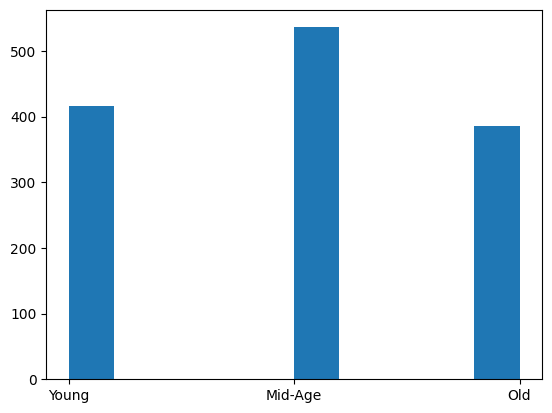

In [151]:
plt.hist(data=insurance_dataset1,x='age_category')

Encoding categorical features

In [152]:
# encoding sex column using Ordinal encoding libraries
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder

onehot = OneHotEncoder(sparse_output=False)
new = onehot.fit_transform(insurance_dataset1[['sex']])
features_names = onehot.get_feature_names_out(['sex'])
new_df = pd.DataFrame(new,columns=features_names)
insurance_dataset2 = pd.concat([insurance_dataset1,new_df],axis=1)
insurance_dataset2.drop('sex',axis=1,inplace=True)
insurance_dataset2


,bmi,children,smoker,region,charges,age_category,sex_female,sex_male
0,27.900,0,yes,southwest,16884.92400,Young,1.0,0.0
1,33.770,1,no,southeast,1725.55230,Young,0.0,1.0
2,33.000,3,no,southeast,4449.46200,Young,0.0,1.0
3,22.705,0,no,northwest,21984.47061,Mid-Age,0.0,1.0
4,28.880,0,no,northwest,3866.85520,Mid-Age,0.0,1.0
...,...,...,...,...,...,...,...,...
1332,30.970,3,no,northwest,10600.54830,Old,0.0,1.0
1333,31.920,0,no,northeast,2205.98080,Young,1.0,0.0
1334,36.850,0,no,southeast,1629.83350,Young,1.0,0.0
1335,25.800,0,no,southwest,2007.94500,Young,1.0,0.0


In [153]:
# encoding age_category column using Ordinal encoding libraries

ord = OrdinalEncoder(categories=[['Young','Mid-Age','Old']])
insurance_dataset2['age_category'] = ord.fit_transform(insurance_dataset2[['age_category']])
insurance_dataset2

,bmi,children,smoker,region,charges,age_category,sex_female,sex_male
0,27.900,0,yes,southwest,16884.92400,0.0,1.0,0.0
1,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0
2,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0
3,22.705,0,no,northwest,21984.47061,1.0,0.0,1.0
4,28.880,0,no,northwest,3866.85520,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1332,30.970,3,no,northwest,10600.54830,2.0,0.0,1.0
1333,31.920,0,no,northeast,2205.98080,0.0,1.0,0.0
1334,36.850,0,no,southeast,1629.83350,0.0,1.0,0.0
1335,25.800,0,no,southwest,2007.94500,0.0,1.0,0.0


In [154]:
insurance_dataset2[(insurance_dataset2['smoker'] == 'yes') & (insurance_dataset2['children'] == 0)]

,bmi,children,smoker,region,charges,age_category,sex_female,sex_male
0,27.900,0,yes,southwest,16884.92400,0.0,1.0,0.0
11,26.290,0,yes,southeast,27808.72510,2.0,1.0,0.0
14,42.130,0,yes,southeast,39611.75770,0.0,0.0,1.0
19,35.300,0,yes,southwest,36837.46700,1.0,0.0,1.0
30,35.600,0,yes,southwest,35585.57600,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1302,27.800,0,yes,southwest,37829.72420,1.0,0.0,1.0
1305,21.850,0,yes,northeast,16115.30450,0.0,1.0,0.0
1307,30.200,0,yes,southwest,33900.65300,0.0,1.0,0.0
1320,26.695,0,yes,northeast,28101.33305,2.0,0.0,1.0


In [155]:
insurance_dataset2[(insurance_dataset2['smoker'] == 'no') & (insurance_dataset2['children'] == 0)]

,bmi,children,smoker,region,charges,age_category,sex_female,sex_male
3,22.705,0,no,northwest,21984.47061,1.0,0.0,1.0
4,28.880,0,no,northwest,3866.85520,1.0,0.0,1.0
5,25.740,0,no,southeast,3756.62160,1.0,1.0,0.0
9,25.840,0,no,northwest,28923.13692,2.0,1.0,0.0
10,26.220,0,no,northeast,2721.32080,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1325,32.870,0,no,northeast,7050.02130,1.0,1.0,0.0
1330,33.400,0,no,southwest,10795.93733,0.0,1.0,0.0
1333,31.920,0,no,northeast,2205.98080,0.0,1.0,0.0
1334,36.850,0,no,southeast,1629.83350,0.0,1.0,0.0


In [156]:
# encoding smoker column using ordinal encoding , as a smoker will take higher amount of insurance
scale = OrdinalEncoder(categories=[['no','yes']])
insurance_dataset2['smoker'] = scale.fit_transform(insurance_dataset2[['smoker']])
insurance_dataset3 = insurance_dataset2

In [157]:
# checking value count of region
insurance_dataset3['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [158]:
# the four regions are almost similar count so it can be dropped as its not relevant
insurance_dataset3.drop('region',inplace=True,axis=1)

Outlier Detection

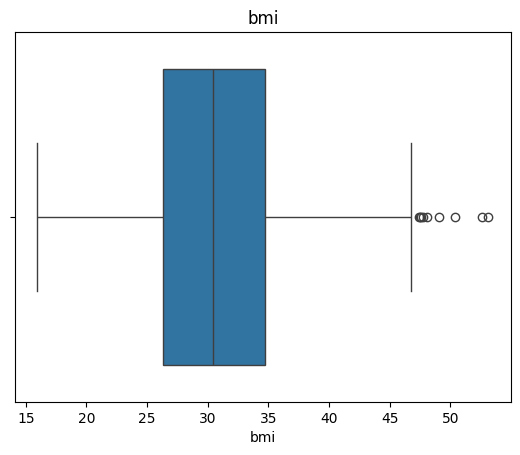

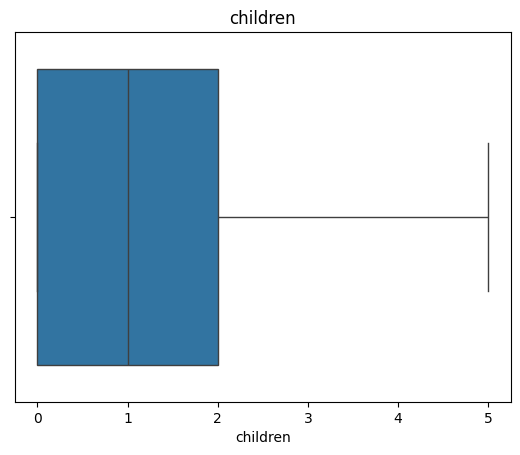

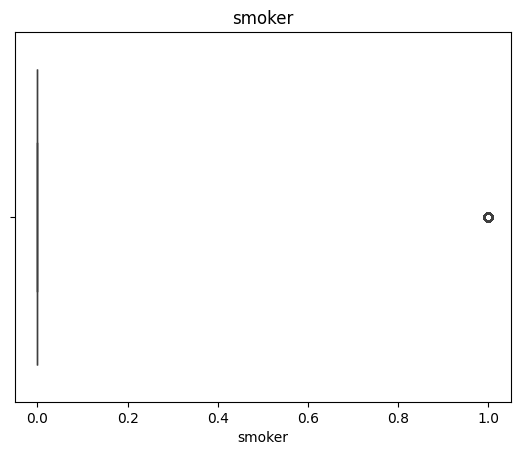

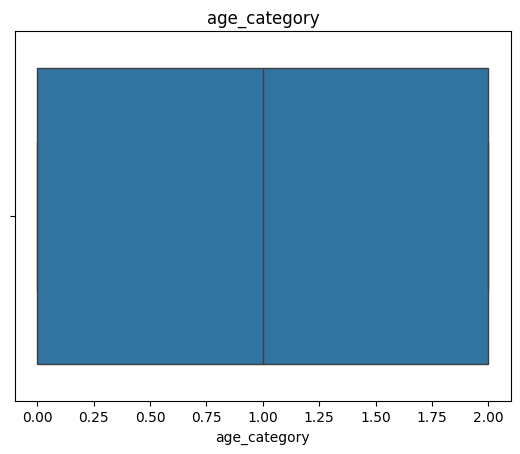

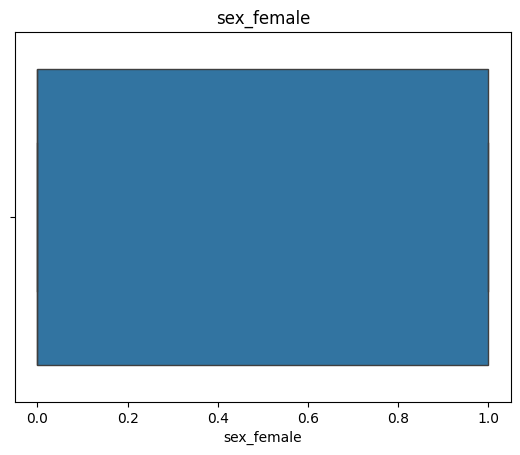

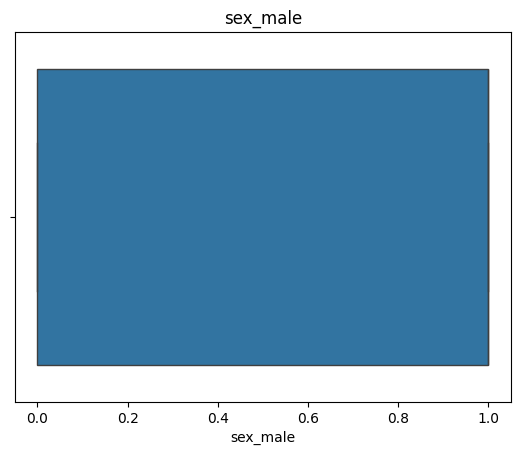

In [159]:
# outlier detection using seaborn (visualizing)
for i in insurance_dataset3.drop('charges',axis=1):
    sns.boxplot(data=insurance_dataset3,x=i)
    plt.title(i)
    plt.show()

Column BMI found to have outliers 

In [160]:
insurance_dataset3[insurance_dataset3['bmi'] >= 45]

,bmi,children,smoker,charges,age_category,sex_female,sex_male
116,49.06,0,0.0,11381.32540,2.0,0.0,1.0
286,48.07,2,0.0,9432.92530,1.0,1.0,0.0
292,45.54,2,1.0,42112.23560,0.0,0.0,1.0
401,47.52,1,0.0,8083.91980,1.0,0.0,1.0
438,46.75,5,0.0,12592.53450,2.0,1.0,0.0
454,46.53,2,0.0,4686.38870,1.0,0.0,1.0
543,47.41,0,1.0,63770.42801,2.0,1.0,0.0
547,46.70,2,0.0,11538.42100,2.0,1.0,0.0
549,46.20,0,1.0,45863.20500,1.0,1.0,0.0
581,45.43,2,0.0,6356.27070,1.0,0.0,1.0


In [161]:
insurance_dataset3['bmi'].min()

15.96

In [162]:
insurance_dataset3['bmi'] = insurance_dataset3['bmi'].clip(lower=15,upper=45)

<Axes: xlabel='bmi'>

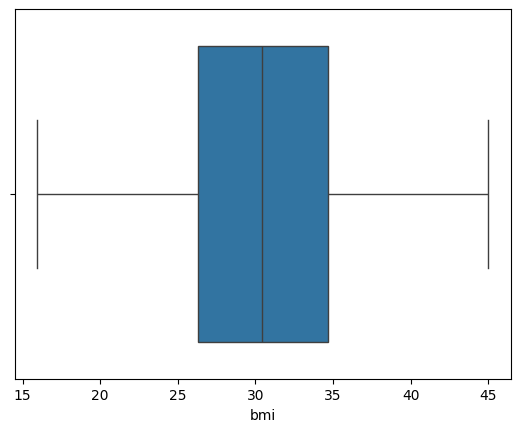

In [163]:
sns.boxplot(data=insurance_dataset3,x='bmi')

In [164]:
insurance_dataset3.corr()

,bmi,children,smoker,charges,age_category,sex_female,sex_male
bmi,1.000000,0.012961,0.002613,0.199395,0.118219,-0.044430,0.044430
children,0.012961,1.000000,0.007331,0.067389,0.044897,-0.017848,0.017848
smoker,0.002613,0.007331,1.000000,0.787234,-0.027894,-0.076596,0.076596
charges,0.199395,0.067389,0.787234,1.000000,0.277641,-0.058044,0.058044
age_category,0.118219,0.044897,-0.027894,0.277641,1.000000,0.018078,-0.018078
sex_female,-0.044430,-0.017848,-0.076596,-0.058044,0.018078,1.000000,-1.000000
sex_male,0.044430,0.017848,0.076596,0.058044,-0.018078,-1.000000,1.000000


Splitting Features and Target

In [165]:
X  =insurance_dataset3.drop('charges',axis = 1)
Y = insurance_dataset3['charges']
X

,bmi,children,smoker,age_category,sex_female,sex_male
0,27.900,0,1.0,0.0,1.0,0.0
1,33.770,1,0.0,0.0,0.0,1.0
2,33.000,3,0.0,0.0,0.0,1.0
3,22.705,0,0.0,1.0,0.0,1.0
4,28.880,0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
1332,30.970,3,0.0,2.0,0.0,1.0
1333,31.920,0,0.0,0.0,1.0,0.0
1334,36.850,0,0.0,0.0,1.0,0.0
1335,25.800,0,0.0,0.0,1.0,0.0


In [166]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

Splitting data into Training data & Testing Data

In [167]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=11)

In [168]:
print(X.shape , X_train.shape , X_test.shape)

(1337, 6) (1069, 6) (268, 6)


Feature Transformation and Scaling

Normalization

In [169]:
from sklearn.preprocessing import MinMaxScaler

# Training data
scale = MinMaxScaler()
X_train['age_category'] = scale.fit_transform(X_train[['age_category']])
X_train['bmi'] = scale.fit_transform(X_train[['bmi']])
X_train

,bmi,children,smoker,age_category,sex_female,sex_male
316,0.546035,0,0.0,1.0,0.0,1.0
340,0.382650,0,0.0,0.0,1.0,0.0
151,0.457158,0,0.0,0.5,0.0,1.0
1281,0.171900,0,1.0,0.0,1.0,0.0
557,0.617172,0,0.0,0.5,0.0,1.0
...,...,...,...,...,...,...
583,0.137839,0,0.0,0.0,0.0,1.0
332,0.508959,0,0.0,1.0,1.0,0.0
1293,0.296612,0,0.0,1.0,0.0,1.0
1115,0.455029,5,0.0,0.5,0.0,1.0


In [170]:
pd.concat([X_train,Y_train],axis=1).corr()

,bmi,children,smoker,age_category,sex_female,sex_male,charges
bmi,1.000000,0.004943,-0.003401,0.106740,-0.052196,0.052196,0.195819
children,0.004943,1.000000,0.013352,0.043662,-0.032950,0.032950,0.074392
smoker,-0.003401,0.013352,1.000000,-0.024284,-0.091038,0.091038,0.775343
age_category,0.106740,0.043662,-0.024284,1.000000,0.004749,-0.004749,0.280055
sex_female,-0.052196,-0.032950,-0.091038,0.004749,1.000000,-1.000000,-0.073627
sex_male,0.052196,0.032950,0.091038,-0.004749,-1.000000,1.000000,0.073627
charges,0.195819,0.074392,0.775343,0.280055,-0.073627,0.073627,1.000000


In [171]:

# Testing data
X_test['age_category'] = scale.fit_transform(X_test[['age_category']])
X_test['bmi'] = scale.fit_transform(X_test[['bmi']])
X_test

,bmi,children,smoker,age_category,sex_female,sex_male
1312,0.645317,2,1.0,0.0,1.0,0.0
1253,0.404959,0,0.0,0.5,1.0,0.0
372,0.592114,1,0.0,0.5,1.0,0.0
937,0.351928,2,0.0,0.0,0.0,1.0
484,0.631543,3,0.0,0.5,0.0,1.0
...,...,...,...,...,...,...
427,0.454718,0,0.0,0.0,1.0,0.0
1152,0.683712,1,0.0,0.5,1.0,0.0
973,0.670110,0,0.0,0.0,0.0,1.0
608,0.752066,2,1.0,0.5,0.0,1.0


Model Training

Linear Regression

In [172]:
# loading linear regression model
model = LinearRegression()

In [173]:
# Building model
model.fit(X_train,Y_train)

LinearRegression()

In [174]:
from sklearn.linear_model import Ridge,Lasso

In [175]:
model = Ridge()
model.fit(X_train,Y_train)

Ridge()

In [176]:
model = Lasso()
model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [177]:
X.columns

Index(['bmi', 'children', 'smoker', 'age_category', 'sex_female', 'sex_male'], dtype='object')

In [178]:
# seperate weights of each column
model.coef_

array([ 9.73724876e+03,  5.20920301e+02,  2.35466913e+04,  8.83431649e+03,
        1.61478378e+02, -1.65117015e-13])

In [179]:
# prediction on training data
Y_predict = model.predict(X_test)


In [180]:
# finding performance of model
metrics.r2_score(Y_predict,Y_test)

0.7542814123318963

In [181]:
# showing the error or difference between actual target and predicted target
# metrics.mean_squared_error(Y_predict,Y_test)

In [182]:
from sklearn.model_selection import cross_val_score

In [183]:
# checking training data score , i.e validating the data while training
cross_val_score(estimator=LinearRegression(),X=X_train,y=Y_train,cv=5,scoring='neg_mean_squared_error')

array([-40963270.52192657, -40623875.7203951 , -45219107.81229713,
       -44740729.94482707, -40647864.77262151])

Building a predictive system

In [184]:
insurance_dataset3

,bmi,children,smoker,charges,age_category,sex_female,sex_male
0,27.900,0,1.0,16884.92400,0.0,1.0,0.0
1,33.770,1,0.0,1725.55230,0.0,0.0,1.0
2,33.000,3,0.0,4449.46200,0.0,0.0,1.0
3,22.705,0,0.0,21984.47061,1.0,0.0,1.0
4,28.880,0,0.0,3866.85520,1.0,0.0,1.0
...,...,...,...,...,...,...,...
1332,30.970,3,0.0,10600.54830,2.0,0.0,1.0
1333,31.920,0,0.0,2205.98080,0.0,1.0,0.0
1334,36.850,0,0.0,1629.83350,0.0,1.0,0.0
1335,25.800,0,0.0,2007.94500,0.0,1.0,0.0


In [185]:
input_data = {
    'bmi': [27.900],
    'children': [0],
    'smoker': [1],
    'age_category': [0],  
    'sex_female': [1],  
    'sex_male': [0]  
}
input_data = pd.DataFrame(input_data)

prediction = model.predict(input_data)

print('Insurance cost is USD', prediction[0])

Insurance cost is USD 294202.7388164547
